# Exp 2: Encoder Problem

### Imports

In [1]:
import gc
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from boltzmann_machine import BoltzmannMachine

from utils import (plot_sigmoid,
                    get_encprob_env_states, 
                   get_encprob_weight_mask, 
                   gen_free_state_dist_pdf, 
                   gen_clamped_state_dist_pdf, 
                   gen_learning_plots_pdf,
                   get_boltzmann_distribution,
                   get_probs_from_counts,
                   plot_series,
                   get_maxCount_hiddState)

## 40-10-40 Encoder

### Learning

In [2]:
grp_size = 40
num_hnodes = 10
env_states = get_encprob_env_states(grp_size)

#### First Stage - No connections to hidden nodes

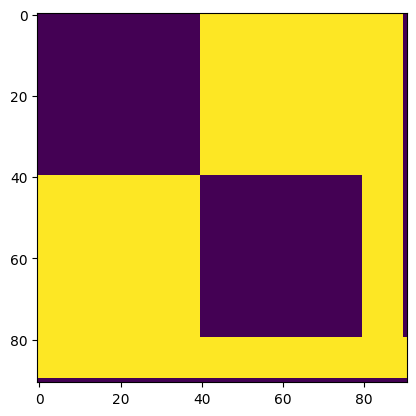

In [3]:
weight_mask_1 = get_encprob_weight_mask(grp_size, num_hnodes, winner_takeAll_stage=True) 
plt.imshow(weight_mask_1)

In [ ]:
# base_dir = './401040_saved_runs/'
# W_1_loaded = np.load(f'{base_dir}/W_1.npy')

In [4]:
bm_1 = BoltzmannMachine(env_states, 
                        num_hnodes, 
                        weight_mask=weight_mask_1, 
               
                    #   init_W=bm.W,
                      # init_W=W_1_loaded,
               
                      noisy_clamping=False,
                      # num_noisyEnvState_per_envState=10,
                      # on_bit_noise=0.1,
                      # off_bit_noise=0.0025,
               
                      log_freq=5,
                      save_debug_data=False,
                      detailed_log=False,
                   
                      clamped_loop_count=1,
                      run_loop_count=1
                      )

bm_1.learn(300)

  0%|          | 0/300 [00:00<?, ?it/s]

39 ------ 0 W_range: (0.0, 0.0)
40 ------ 1 W_range: (-10.0, 2.0)
40 ------ 0 W_range: (-20.0, 8.0)
38 ------ 0 W_range: (-28.0, 14.0)
39 ------ 0 W_range: (-30.0, 16.0)
40 ------ 0 W_range: (-32.0, 14.0)
40 ------ 0 W_range: (-34.0, 16.0)
39 ------ 0 W_range: (-36.0, 18.0)
40 ------ 0 W_range: (-38.0, 20.0)
37 ------ 0 W_range: (-38.0, 18.0)
40 ------ 0 W_range: (-40.0, 16.0)
40 ------ 0 W_range: (-40.0, 22.0)
39 ------ 0 W_range: (-44.0, 24.0)
40 ------ 0 W_range: (-46.0, 26.0)
37 ------ 0 W_range: (-46.0, 28.0)
40 ------ 0 W_range: (-46.0, 34.0)
38 ------ 0 W_range: (-46.0, 32.0)
39 ------ 0 W_range: (-48.0, 30.0)
40 ------ 0 W_range: (-50.0, 32.0)
38 ------ 0 W_range: (-50.0, 38.0)
40 ------ 0 W_range: (-52.0, 36.0)
39 ------ 0 W_range: (-54.0, 34.0)
40 ------ 2 W_range: (-54.0, 36.0)
39 ------ 1 W_range: (-56.0, 42.0)
40 ------ 0 W_range: (-56.0, 40.0)
40 ------ 0 W_range: (-58.0, 42.0)
40 ------ 1 W_range: (-58.0, 44.0)
40 ------ 1 W_range: (-58.0, 46.0)
40 ------ 2 W_range: (-58

In [5]:
px.imshow(bm_1.W)

In [ ]:
# base_dir = './401040_saved_runs/'
# np.save(f'{base_dir}/W_1', bm_1.W)

#### Second Stage

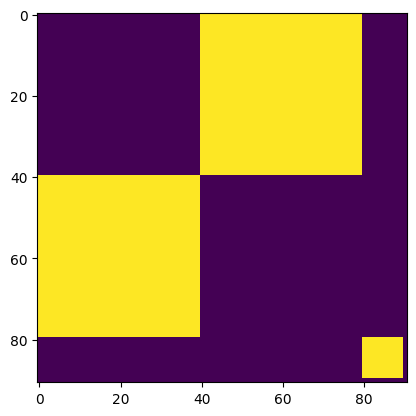

In [6]:
weight_mask_2 = get_encprob_weight_mask(grp_size, num_hnodes) 
plt.imshow(weight_mask_2)

In [7]:
bm_2 = BoltzmannMachine(env_states, 
                        num_hnodes, 
                        weight_mask=weight_mask_2, 
                       
                        init_W=bm_1.W,
                        # init_W=bm_2.W,

                        # noisy_clamping=True,
                        noisy_clamping=False,
                        
                        # num_noisyEnvState_per_envState=1,
                        # on_bit_noise=0.1,
                        # off_bit_noise=0.0025,
                        
                        log_freq=10,
                        save_debug_data=False,
                        detailed_log=False,
                        
                        run_loop_count=1,
                        clamped_loop_count=1
                        )

# bm_2.num_freeRun_inits = 100

bm_2.learn(200)
# bm_2.learn(50)

  0%|          | 0/200 [00:00<?, ?it/s]

39 ------ 0 W_range: (-84.0, 64.0)
34 ------ 0 W_range: (-86.0, 60.0)
39 ------ 2 W_range: (-90.0, 56.0)
37 ------ 7 W_range: (-94.0, 48.0)
39 ------ 5 W_range: (-102.0, 56.0)
40 ------ 6 W_range: (-112.0, 60.0)
40 ------ 11 W_range: (-126.0, 60.0)
40 ------ 13 W_range: (-136.0, 64.0)
40 ------ 14 W_range: (-144.0, 72.0)
40 ------ 15 W_range: (-152.0, 80.0)
40 ------ 15 W_range: (-162.0, 76.0)
40 ------ 18 W_range: (-166.0, 84.0)
40 ------ 16 W_range: (-174.0, 92.0)
40 ------ 16 W_range: (-184.0, 92.0)
40 ------ 20 W_range: (-188.0, 88.0)
40 ------ 21 W_range: (-200.0, 96.0)
40 ------ 22 W_range: (-206.0, 96.0)
40 ------ 18 W_range: (-206.0, 102.0)
40 ------ 20 W_range: (-216.0, 98.0)
40 ------ 25 W_range: (-220.0, 104.0)


In [8]:
# print(bm_2.W.min(), bm_2.W.max())
# px.imshow(bm_2.W)

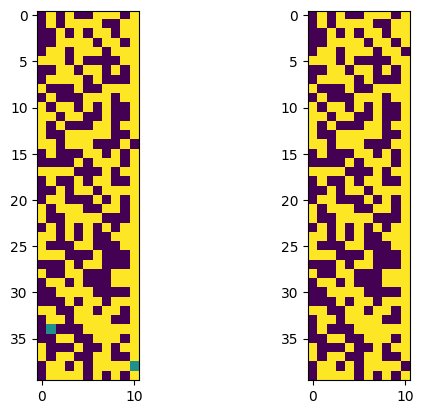

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(np.sign(bm_2.W[:40, -11:]))
ax2.imshow(np.sign(bm_2.W[40:80, -11:]))

In [9]:
def hamming_distance_matrix_vectorized(array):
    """
    Create a symmetric Hamming distance matrix for a list of vectors in a vectorized format.
    """
    # Convert the list of vectors to a 2D NumPy array
    # array = np.array(array)
    
    # Compute the Hamming distance matrix using broadcasting
    # XOR operation between all pairs of rows, then sum mismatches along the last axis
    distance_matrix = np.bitwise_xor(array[:, None, :], array).sum(axis=2)
    
    return distance_matrix

In [10]:
codes = np.sign(bm_2.W[:40, -11:])
codes[codes==-1] = 0

hamm_mat = hamming_distance_matrix_vectorized(codes.astype(int))
np.unique(hamm_mat, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 40,   6,  50, 184, 298, 380, 320, 204,  92,  24,   2], dtype=int64))

In [11]:
np.unique(np.sign(bm_2.W[:40, -11:]), axis=0).shape, np.unique(np.sign(bm_2.W[40:80, -11:]), axis=0).shape

((40, 11), (40, 11))

In [12]:
num_matches = (np.sign(bm_2.W[:40, -11:]) == np.sign(bm_2.W[40:80, -11:])).sum(axis=1)
print(num_matches)
np.unique(num_matches, return_counts=True)

[11 11 11 11 10 11 11 11 11 11 11 11 11 11 10 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 10 11 11 11 10 11]


(array([10, 11]), array([ 4, 36], dtype=int64))

In [47]:
base_dir = './401040_saved_runs/'
np.save(f'{base_dir}/W_2_NM5', bm_2.W)

#### Third Stage 

In [15]:
bm_3 = BoltzmannMachine(env_states, 
                        num_hnodes, 
                        weight_mask=weight_mask_2, 
                     
                      init_W=bm_2.W,
                      # init_W=bm_3.W,
                    
                      noisy_clamping=False,
                      # num_noisyEnvState_per_envState=1,
                      # on_bit_noise=0.1,
                      # off_bit_noise=0.0025,
                    
                      log_freq=10,
                      save_debug_data=False,
                      detailed_log=False,
                     
                      run_loop_count=1,
                      clamped_loop_count=1
                      )


# bm_3.num_freeRun_inits = 100

bm_3.learn(100)

  0%|          | 0/100 [00:00<?, ?it/s]

40 ------ 12 W_range: (-134.0, 64.0)
40 ------ 12 W_range: (-138.0, 60.0)
40 ------ 13 W_range: (-148.0, 64.0)
40 ------ 16 W_range: (-158.0, 68.0)
40 ------ 23 W_range: (-162.0, 72.0)
40 ------ 17 W_range: (-166.0, 74.0)
40 ------ 23 W_range: (-174.0, 74.0)
40 ------ 23 W_range: (-182.0, 82.0)
40 ------ 18 W_range: (-190.0, 78.0)
40 ------ 22 W_range: (-198.0, 82.0)


In [16]:
# px.imshow(bm_3.W)

In [20]:
codes = np.sign(bm_3.W[:40, -11:])
codes[codes==-1] = 0

hamm_mat = hamming_distance_matrix_vectorized(codes.astype(int))
np.unique(hamm_mat, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 40,   6,  50, 146, 346, 360, 358, 176,  76,  40,   2], dtype=int64))

In [19]:
np.unique(np.sign(bm_3.W[:40, -11:]), axis=0).shape, np.unique(np.sign(bm_3.W[40:80, -11:]), axis=0).shape

((40, 11), (40, 11))

In [18]:
num_matches = (np.sign(bm_3.W[:40, -11:]) == np.sign(bm_3.W[40:80, -11:])).sum(axis=1)
print(num_matches)
np.unique(num_matches, return_counts=True)

[10 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 10 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 10]


(array([10, 11]), array([ 3, 37], dtype=int64))

In [42]:
base_dir = './401040_saved_runs/'
np.save(f'{base_dir}/W_3_NM3', bm_3.W)

In [ ]:
# W_loaded = np.load(f'{base_dir}/W_3.npy')
# W_loaded

array([[   0., -206., -228., ...,  -76., -150.,   64.],
       [-206.,    0., -110., ...,  -46.,   80.,   74.],
       [-228., -110.,    0., ...,  106., -120.,   50.],
       ...,
       [ -76.,  -46.,  106., ...,    0.,    0.,  -46.],
       [-150.,   80., -120., ...,    0.,    0.,  136.],
       [  64.,   74.,   50., ...,   -6.,   56.,    0.]])

#### Search

100%|██████████| 40/40 [08:26<00:00, 12.66s/it]

399


(array([  3.,   0.,   0.,   2.,   3.,  12.,  12.,  15.,  28., 279.]),
 array([ 2912. ,  4620.6,  6329.2,  8037.8,  9746.4, 11455. , 13163.6,
        14872.2, 16580.8, 18289.4, 19998. ]),
 <BarContainer object of 10 artists>)

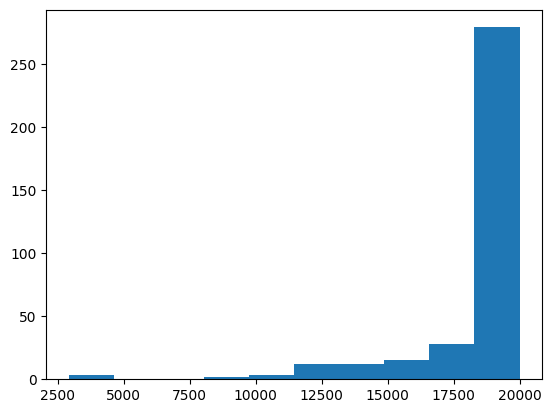

In [13]:
# W_test = bm_3.W
W_test = bm_2.W
# W_test = W_loaded



bm_test = BoltzmannMachine(env_states, 
                           num_hnodes, 
                           weight_mask=weight_mask_2, 
                           init_W=W_test,
                           noisy_clamping=False,
                           save_debug_data=True,
                           run_loop_count=1,
                      )

bm_test.sa_sched = [(4, 20), (4, 15), (4, 12), (8, 10), (8, 10)]
bm_test.equil_time_temp = (400, 10)

res = []
confidence = []
pred_probs = []

for env_state in tqdm(env_states):
    query = env_state.copy()
    query[grp_size: 2*grp_size] = -1

    for i in range(10):
        equi_samples = bm_test.search(query.copy())
        a,b = np.unique(equi_samples[:, :-1-num_hnodes], axis=0, return_counts=True)
        res.append(np.array_equal(env_state, a[b.argmax()]))
       
        pred_probs.append(b.max()/b.sum())
        b.sort()
        if len(b)>1:
            confidence.append(b[-1]-b[-2])

res = np.array(res)
print(res.sum())
plt.hist(confidence)

(array([  2.,   3.,   5.,   4.,  15.,  15.,  13.,  39.,  74., 230.]),
 array([0.2952 , 0.36568, 0.43616, 0.50664, 0.57712, 0.6476 , 0.71808,
        0.78856, 0.85904, 0.92952, 1.     ]),
 <BarContainer object of 10 artists>)

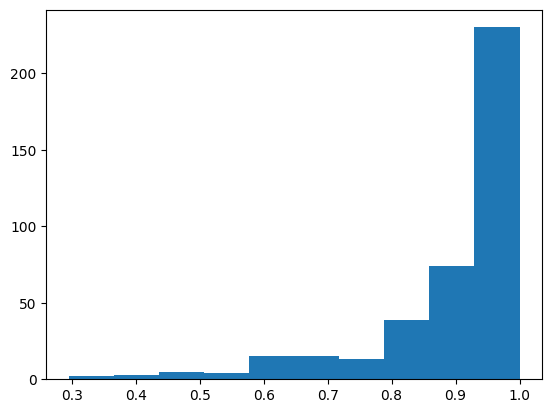

In [34]:
plt.hist(pred_probs)

### Naive Learning

In [3]:
base_dir = './401040_saved_runs/noiseMultiple5/'
W_loaded = np.load(f'{base_dir}/W.npy')

In [6]:
W_loaded.min(), W_loaded.max()

(-308.0, 112.0)

In [4]:
# init_W = np.

bm = BoltzmannMachine(env_states, 
                      num_hnodes, 
                      weight_mask=weight_mask, 
                    #   init_W=bm.W,
                      init_W=W_loaded,
                      noisy_clamping=True,
                      num_noisyEnvState_per_envState=5,
                      on_bit_noise=0.1,
                      off_bit_noise=0.0025,
                      log_freq=5,
                      save_debug_data=False,
                      detailed_log=False
                      )

bm.learn(100)

  0%|          | 0/100 [00:00<?, ?it/s]

40 ------ 23
40 ------ 23
40 ------ 19
40 ------ 24
40 ------ 25
40 ------ 27
40 ------ 23
40 ------ 26
40 ------ 26
40 ------ 22
40 ------ 22
40 ------ 23
40 ------ 23
40 ------ 26
40 ------ 25
40 ------ 23
40 ------ 26
40 ------ 25
40 ------ 26
40 ------ 26


In [5]:
base_dir = './401040_saved_runs/noiseMultiple5/'
np.save(f'{base_dir}/W', bm.W)

In [6]:
px.imshow(bm.W)

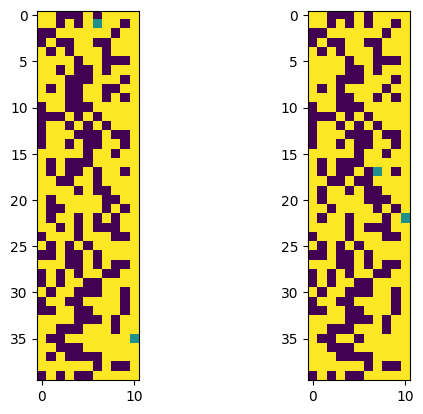

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(np.sign(bm.W[:40, -11:]))
ax2.imshow(np.sign(bm.W[40:80, -11:]))